In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential       # class
from tensorflow.keras.models import load_model       # model 사용
from tensorflow.keras.layers import Dense            # 전결합
from tensorflow.keras.callbacks import EarlyStopping # 학습 자동 중지
from tensorflow.keras import regularizers       # 가중치에 L1, L2 규제 적용

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
data = np.loadtxt('./wine_2.csv', delimiter=",", dtype=np.float64)
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(6497, 13)


In [3]:
X = data[:, 0:12]
print(X.shape)
Y = data[:, 12]
print(Y.shape)

(6497, 12)
(6497,)


In [4]:
# train_test_split 분할을 통한 훈련, 검증, 테스트 데이터의 분리
seed = 0
# 90%: 분할대기, 10%: 테스트
x_train_all, x_test, y_train_all, y_test = train_test_split(X, Y,
                                                            stratify=Y,
                                                            test_size=0.1,
                                                            random_state=seed)
# 나머지 데이터 85%를 분할, 90%: 훈련, 10%: 검증
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                  stratify=y_train_all,
                                                  test_size=0.1,
                                                  random_state=seed)

print(y_val)
print(y_val.shape)

[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [10]:
model = Sequential()

# 네트워크 구성
# model.add(Dense(128, input_dim=12, activation='relu'))
model.add(Dense(64, input_shape=(12, ), activation='relu'))
# model.add(Dense(64, activation='relu')) # 입력: 128, 출력: 64 
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 0 ~ 1 사이의 값으로 변경
# 1: 출력 노드 수, input_dim=10: 입력 데이터 갯수

# 학습 설정, 수치예측은 metrics 생략시 loss에 지정된 mse를 사용
model.compile(optimizer='adam', loss='binary_crossentropy', 
                                metrics=['accuracy'])

# 최소 오차 5번 나오면 자동 종료
early_stopping = EarlyStopping(monitor='loss', patience=5)
# 학습
hist = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, 
                 batch_size=10, callbacks=[early_stopping])
# x_train: 훈련 데이터, y_train: 타깃(실제값)
# validation_split=0.2: 훈련과 검증을 80:20으로 데이터 분할
# shuffle=True: 데이터 무작위 검증
# epochs=300: 전체 데이터 학습 횟수
# batch_size=1: 1건 처리후 가중치 변경
#               100 * (100 / 1) = 10000번 가중치 변경

Train on 5262 samples, validate on 585 samples
Epoch 1/1000
5262/5262 [==============================] - 1s 228us/sample - loss: 0.2350 - accuracy: 0.9170 - val_loss: 0.1858 - val_accuracy: 0.9333
Epoch 2/1000
5262/5262 [==============================] - 1s 141us/sample - loss: 0.1807 - accuracy: 0.9386 - val_loss: 0.1669 - val_accuracy: 0.9368
Epoch 3/1000
5262/5262 [==============================] - 1s 138us/sample - loss: 0.1634 - accuracy: 0.9434 - val_loss: 0.2266 - val_accuracy: 0.9350
Epoch 4/1000
5262/5262 [==============================] - 1s 135us/sample - loss: 0.1448 - accuracy: 0.9506 - val_loss: 0.1469 - val_accuracy: 0.9487
Epoch 5/1000
5262/5262 [==============================] - 1s 140us/sample - loss: 0.1230 - accuracy: 0.9601 - val_loss: 0.1119 - val_accuracy: 0.9624
Epoch 6/1000
5262/5262 [==============================] - 1s 134us/sample - loss: 0.1082 - accuracy: 0.9650 - val_loss: 0.0957 - val_accuracy: 0.9692
Epoch 7/1000
5262/5262 [=============================

5262/5262 [==============================] - 1s 137us/sample - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0364 - val_accuracy: 0.9880
Epoch 56/1000
5262/5262 [==============================] - 1s 137us/sample - loss: 0.0398 - accuracy: 0.9892 - val_loss: 0.0489 - val_accuracy: 0.9846
Epoch 57/1000
5262/5262 [==============================] - 1s 135us/sample - loss: 0.0444 - accuracy: 0.9873 - val_loss: 0.0508 - val_accuracy: 0.9846
Epoch 58/1000
5262/5262 [==============================] - 1s 132us/sample - loss: 0.0402 - accuracy: 0.9890 - val_loss: 0.0453 - val_accuracy: 0.9880
Epoch 59/1000
5262/5262 [==============================] - 1s 138us/sample - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0371 - val_accuracy: 0.9880
Epoch 60/1000
5262/5262 [==============================] - 1s 138us/sample - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0395 - val_accuracy: 0.9846
Epoch 61/1000
5262/5262 [==============================] - 1s 141us/sample - loss: 0.0415 - accuracy: 0.9878

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                832       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,103
Trainable params: 3,103
Non-trainable params: 0
_________________________________________________________________


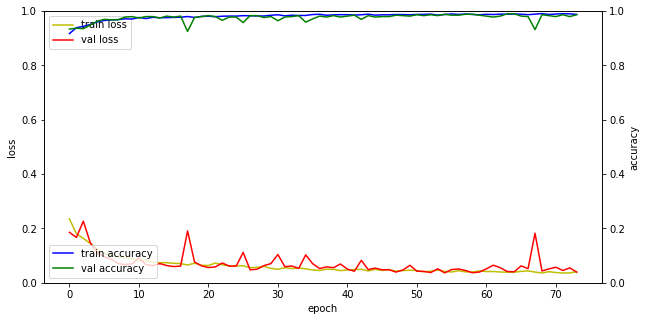

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

acc_ax = loss_ax.twinx()  # 오른쪽 y 출 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 1.0]) # 값을 반영하여 변경

# 오른쪽 y 축 설정
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylim([0.0, 1.0])

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차
acc_ax.set_ylabel('accuracy') # 정확도

loss_ax.legend(loc='upper left') # 오차 레이블 위치
acc_ax.legend(loc='lower left')  # 정확도 레이블 위치

plt.show()


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
print('손실값:', test_loss, '/정확도:', (test_acc*100), '%')

손실값: 0.031128517356224253 /정확도: 99.23076629638672 %


In [13]:
model.save('./wine.h5')

In [14]:
pd = model.predict(x_test[0:10])

for i in range(len(x_test[0:10])):
    fmt = '실제값: {0}, 예측값: {1}'
    print(fmt.format(y_test[i], pd[i]), end='')
    
    if (pd[i] >= 0.5):
        print('--> Red 와인')   # 1
    else:
        print('--> White 와인') # 0

실제값: 0.0, 예측값: [0.00021043]--> White 와인
실제값: 0.0, 예측값: [0.00122231]--> White 와인
실제값: 0.0, 예측값: [0.00138927]--> White 와인
실제값: 0.0, 예측값: [0.00135317]--> White 와인
실제값: 1.0, 예측값: [0.06560832]--> White 와인
실제값: 0.0, 예측값: [0.00510567]--> White 와인
실제값: 0.0, 예측값: [0.00091326]--> White 와인
실제값: 0.0, 예측값: [0.00117657]--> White 와인
실제값: 0.0, 예측값: [0.29019076]--> White 와인
실제값: 0.0, 예측값: [0.00025227]--> White 와인
